<a href="https://colab.research.google.com/github/JhonnyLimachi/Sigmoidal/blob/main/63_Sobre_o_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Visualizações de Dados com Python**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

In [1]:
# importar pacotes
import numpy as np
import matplotlib.pyplot as plt

# Conhecendo o Matplotlib

Muitos usam, poucos entendem. Matplotlib é a principal biblioteca para visualização do Python. Construída em cima de *arrays* do `numpy` e concebida para integrar com as principais ferramentes de *Data Science*, Matplotlib foi criada em 2002 pelo John Hunter.

John era um neurobiologista que analisava sinais de eletrocorticografia, juntamente com um time de pesquisadores. Como eles usavam um *software* proprietário e tinham apenas uma licença, o pesquisador criou o Matplotlib para suprir essa necessidade original, insipirando-se na interface scriptada que o MATLAB proporcionava.

Quando eu disse na primeira linha que muitas pessoas usam a biblioteca, mas poucas de fato a entendem, eu quis dizer que  elas desconhecem a maneira como a arquitetura do `matplotlib` foi pensada.

## Arquitetura do Matplotlib

Basicamente, a arquitetura do `matplotlib` é composta de 3 camadas:

1. ***Scripting Layer***
2. ***Artist Layer***
3. ***Backend Layer***

Para entender como o pacote funciona, é preciso entender que a arquitetura do Matplotlib foi feita para permitir aos seus usuários criarem, renderizarem e atualizarem objetos do tipo `Figure`. Essas *Figuras* são exibidas na tela e interagem com eventos como os *inputs* do teclado e mouse. Esse tipo de interação é realizada na camada ***backend***.

O Matplotlib permite que você crie um gráfico composto por múltiplos objetos diferentes. É como se ele não gerasse uma coisa única, mas uma imagem que é composta de vários pedaços isolados, como o eixo-y, eixo-y, título, legendas, entre outras. A capacidade de alterar todos múltiplos objetos é proporcionada pela camada ***artist***. Olhe o código abaixo e veja como estamos lidandos com esses "múltiplos objetos". Plotamos os dados no plano cartesiano, criamos um título e demos *labels* aos eixos x e y.

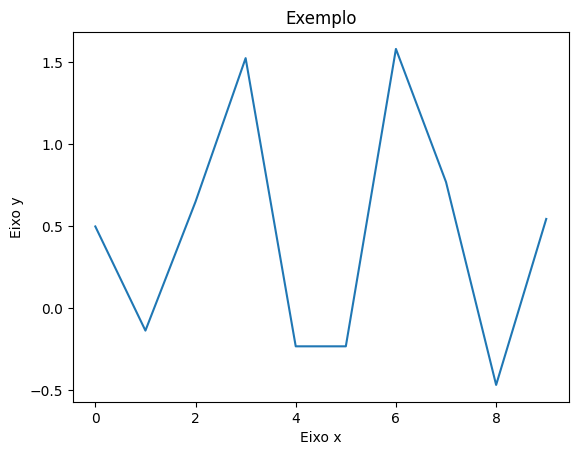

In [2]:
# gerar valores demonstrativos
np.random.seed(42)
x = np.arange(10)
y = np.random.normal(size=10)

# plotar os valores
plt.plot(x, y)
plt.title("Exemplo")
plt.xlabel("Eixo x")
plt.ylabel("Eixo y")

plt.show()

Para você, usuário, conseguir se comunicar com essas duas camadas, e manipular as `Figures`, existe uma terceira camada, a camada ***scripting***. Ela abstrai em um nível mais alto todo contato com o Matplotlib, e permite que de maneira simples e direta possamos criar nossos *plots*.

<center><img src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/matplotlib_arquitetura.jpg" width="400px"></center>

Quero pedir a você para [ler este artigo](https://realpython.com/python-matplotlib-guide/) do *blog* ***Real Python***. É um dos melhores aritogs sobre matplotlib que já tive contato, e vai explicar vários conceitos da ferramenta. Você não precisa saber os detalhes da arquitetura do `matplotlib`, mas precisa ter uma ideia geral sobre seu funcionamento. Caso queira se aprofundar mais ainda, recomendo o livro [*Mastering matplotlib*](https://learning.oreilly.com/library/view/mastering-matplotlib/9781783987542/).

## Conhecendo mais intimamente o Matplotlib

Se você lembrar das aulas anteriores, plotar um gráfico é muito simples e direto. Algo como `plt.plot(x, y)` vai te dar prontamente um gráfico.

No entanto, essa abstração esconde um segredo importante: a hierarquia de 3 objetos que estão por trás de cada *plot*. Vou usar as imagens do artigo [*Python Plotting With Matplotlib*](https://realpython.com/python-matplotlib-guide/) para facilitar o entendimento desse conceito.

<center><img src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/fig_map.bc8c7cabd823.png" height="300px"></center>

O objeto mais "exterior" a cada plot é o objeto do tipo `Figure`. Dentro de uma `Figure` existe um objeto do tipo `Axes`. Dentro de cada `Axes` ficam os objetos menores, como legendas, títulos, textos e *tick marks*.

Como disse Brad Solomon no artigo, a principal confusão das pessoas é não entenderem que um *plot* (ou gráfico) individual está contido dentro de um objeto `Axes`. Uma `Figure` não é o *plot* em si, ela pode conter um ou mais *plots* (e cada *plot* é um `Axes`).

Como eu disse, cada `Axes` é composto de objetos menores que compõe o *plot* propriamente dito. A grande maioria das pessoas (incluindo eu mesmo) conhece apenas or principais, como título, eixos, labels e legenda. No entanto, para você ver a anatomia completa dentro de um `Axes`, pode usar o código abaixo, disponibilizado na [documentação oficial do `matplotlib`](https://matplotlib.org/examples/showcase/anatomy.html).


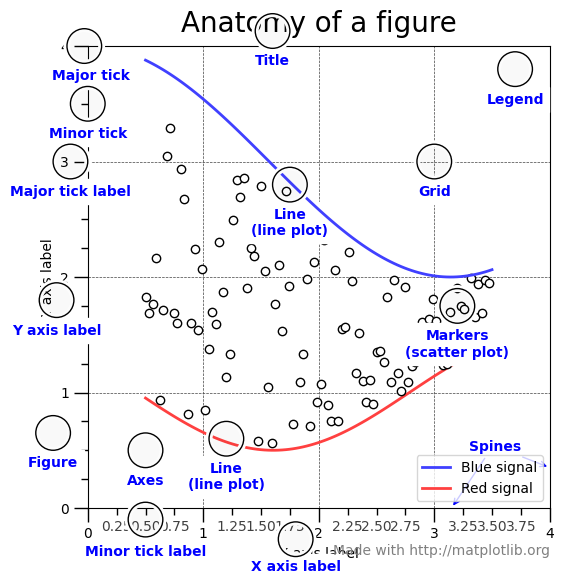

In [3]:
#@title
# This figure shows the name of several matplotlib elements composing a figure

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter


np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()


## Abordagem Orientada a Objeto

De acordo com a documentação oficial do Matplotlib, a biblioteca plota seus dados em objetos do tipo `Figure` (janelas, Jupyter widgets, entre outros), e esses objetos podem conter um ou mais objetos do tipo `Axes` (uma área onde pontos podem ser especificados em termos de coordenadas x-y, coordenadas polares, x-y-z, entre outras).

Nessa abordagem orientada a objeto, mais customizações e tipos de gráficos são possíveis.

O estilo "orientado a objeto" cria explicitamente dois objetos, `Figure` e `Axes`, e chamada os métodos em cima deles.

A maneira mais simples de criar uma figura com um *axes* é usando o `pyplot.subplots`, ou abreviadamente, `plt.subplots`.

Então, você pode usar o método `Axes.plot` para desenhar dados em cima de algum *axes*.

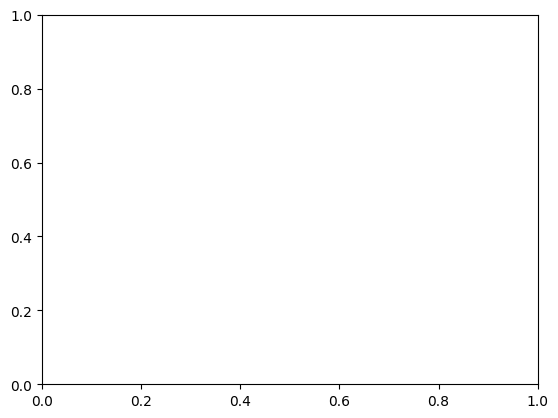

In [4]:
fig, ax = plt.subplots()

O que fizemos acima foi criar uma Figura que irá conter todos os *plots* (`Axes`). Neste caso, como não especificamos nada, foi criado apenas 1 `Figure` e 1 `Axes` (*plot*).

A partir disso, a manipulação e customização passa a ser diretamente na variável `ax`, chamando seus métodos.

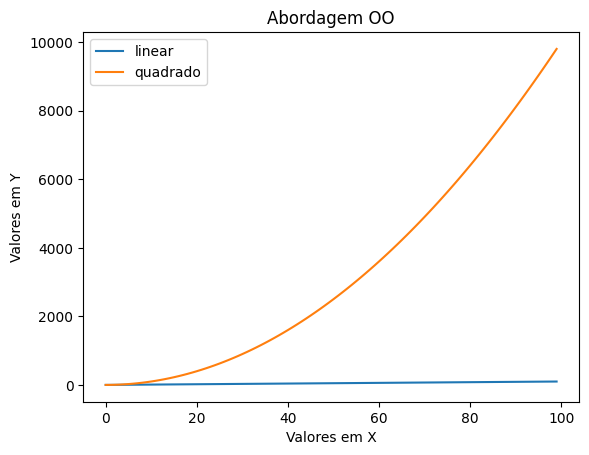

In [5]:
x = np.arange(0, 100)

# plotar os valores
fig, ax = plt.subplots()
ax.plot(x, x, label="linear")
ax.plot(x, x**2, label="quadrado")
ax.set_title("Abordagem OO")
ax.set_ylabel("Valores em Y")
ax.set_xlabel("Valores em X")
ax.legend()

# fig.show()
fig.show()